In [98]:
%load_ext autoreload
%autoreload 1
%aimport graph_util

from pathlib import Path
import re
import shutil

from graph_util import plot_experiment
from constants import ENV_NAMES, EASY_GAME_RANGES
# %matplotlib qt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [85]:
# Copy progress.csv files
r = re.compile('Reactor_([^_]*)')
for p in Path('/Users/jurgis/Documents/procgen-starter/log').glob('**/progress.csv'):
    match = r.search(str(p))
    env = match.group(1)
    is_gen = '_gen' in str(p)
    if is_gen:
        dest_path = f'./results/easy-200-r_e356_eaa01ap_hrc_ars_g995_gen-run0/progress-{env}.csv'
    else:
        dest_path = f'./results/easy-all-r_e356_eaa01ap_hrc_ars_g995-run0/progress-{env}.csv'
    print(dest_path)
    shutil.copy(p, dest_path)

./results/easy-all-r_e356_eaa01ap_hrc_ars_g995-run0/progress-maze.csv
./results/easy-200-r_e356_eaa01ap_hrc_ars_g995_gen-run0/progress-ninja.csv
./results/easy-200-r_e356_eaa01ap_hrc_ars_g995_gen-run0/progress-caveflyer.csv
./results/easy-200-r_e356_eaa01ap_hrc_ars_g995_gen-run0/progress-dodgeball.csv
./results/easy-200-r_e356_eaa01ap_hrc_ars_g995_gen-run0/progress-chaser.csv
./results/easy-200-r_e356_eaa01ap_hrc_ars_g995_gen-run0/progress-climber.csv
./results/easy-200-r_e356_eaa01ap_hrc_ars_g995_gen-run0/progress-leaper.csv
./results/easy-all-r_e356_eaa01ap_hrc_ars_g995-run0/progress-starpilot.csv
./results/easy-200-r_e356_eaa01ap_hrc_ars_g995_gen-run0/progress-bossfight.csv
./results/easy-all-r_e356_eaa01ap_hrc_ars_g995-run0/progress-bigfish.csv
./results/easy-all-r_e356_eaa01ap_hrc_ars_g995-run0/progress-caveflyer.csv
./results/easy-all-r_e356_eaa01ap_hrc_ars_g995-run0/progress-ninja.csv
./results/easy-all-r_e356_eaa01ap_hrc_ars_g995-run0/progress-leaper.csv
./results/easy-200-r_e3

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fa329574850>)

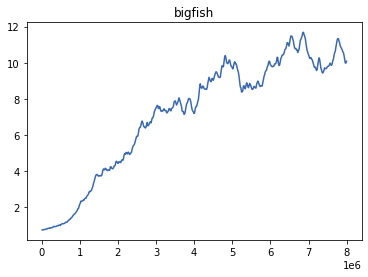

In [135]:
plot_experiment('easy-all-run',
    env_names=['bigfish'],
    smoothing=0.9,
    x_key_name='misc/total_timesteps',
    max_x=int(3051/50*8),
    num_runs=1,
    # x_scale=0.016084,
    # first_valid=10,
    )

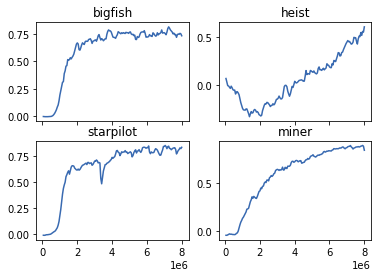

In [137]:
f, ax = plot_experiment('easy-all-r_e356_eaa01ap_hrc_ars_g995-run', 
    key_name='episode_reward_mean',
    x_key_name='info/num_steps_sampled',
    env_names=['bigfish', 'heist', 'starpilot', 'miner'],
    # env_names=['bigfish'],
    num_runs=1,
    normalization_ranges=EASY_GAME_RANGES,
    smoothing=0.7)